In [1]:
import soundfile
import matplotlib.pyplot as plt

### Get equalizer coefs

#### Read files

In [32]:
sweeper_original, sweeper_original_sample_rate = soundfile.read('data/sweeper//sweeper_original.wav')
sweeper_recorded, sweeper_recorded_sample_rate = soundfile.read('data/sweeper/sweeper_recorded.wav')

#### Get equalizer coefs 

In [30]:
from dsp.equalizer import *

In [33]:
eqaulizer_coefs, bands = get_equalizer(sweeper_original, 
                                        sweeper_original_sample_rate,
                                        sweeper_recorded,
                                        sweeper_recorded_sample_rate,
                                        num_bands=128)

/home/alexey/dsp/dsp/equalizer.py:30: RuntimeWarning: Mean of empty slice.
  mean_speaker[i] = fft_speaker[(freqs_speaker < bands[i]) & ((freqs_speaker > bands[i-1]))].mean()
/home/alexey/miniconda3/envs/dsp/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/alexey/dsp/dsp/equalizer.py:32: RuntimeWarning: invalid value encountered in divide
  eqaulizer_coefs = mean_speaker / mean_original


#### Check equalizer with sweeper

In [48]:
equal_signal, fft_equal = apply_equaizer(sweeper_recorded, sweeper_recorded_sample_rate,  eqaulizer_coefs, bands)

In [49]:
len(equal_signal)

1218812

In [45]:
freq_or = fftfreq(len(sweeper_original), 1/sweeper_original_sample_rate)
freqs_sp = fftfreq(len(sweeper_recorded), 1/sweeper_recorded_sample_rate)
fft_eq = fftfreq(len(equal_signal), 1/sweeper_recorded_sample_rate)

In [54]:
sweeper_speaker

(array([0., 0., 0., ..., 0., 0., 0.]), 44100)

/home/alexey/miniconda3/envs/dsp/lib/python3.10/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/alexey/miniconda3/envs/dsp/lib/python3.10/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


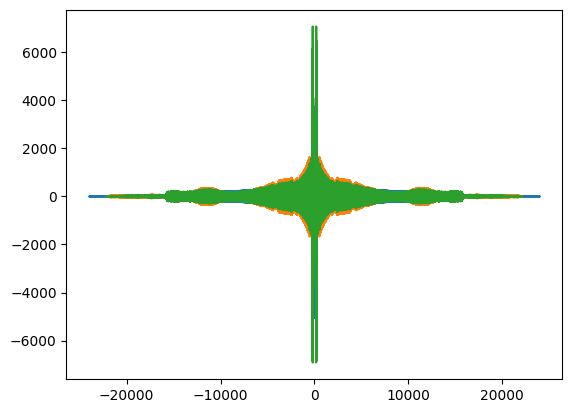

In [55]:
plt.plot(freq_or, fft(sweeper_original).real)
plt.plot(freqs_sp, fft(sweeper_recorded).real)
plt.plot(fft_eq, fft(equal_signal))

### Apply equalizer to white noise 

In [58]:
white_noise, noise_rate = soundfile.read('data/white_noise/370830__deleted_user_5959249__white-noise.wav')

In [61]:
white_noise_equalized, white_noise_fft = apply_equaizer(white_noise, noise_rate, eqaulizer_coefs, bands)

/home/alexey/dsp/dsp/equalizer.py:43: RuntimeWarning: invalid value encountered in divide
  fft_speaker[(freqs_speaker < bands[i]) & ((freqs_speaker > bands[i-1]))] /= equalizer_coefs[i]


In [62]:
white_noise_equalized.real

array([[ 0.19332886,  0.19720459],
       [-0.7727356 ,  0.0864563 ],
       [ 0.30047607,  0.93988037],
       ...,
       [ 0.50564575,  0.50790405],
       [ 0.37228394, -0.12661743],
       [ 0.60202026, -0.19692993]])

In [63]:
soundfile.write('data/white_noise/equalized_white_noise.wav', white_noise_equalized.real,  48000, )

### Get impulse response

In [64]:
from scipy.signal import deconvolve

In [100]:
white_noise_recorded, white_noise_recorded_rate = soundfile.read('data/white_noise/white_noise_recorded.wav')

In [101]:
# aligment
start_index = (np.abs(white_noise_recorded) > 0.01).argmax()
white_noise_recorded = white_noise[start_index:]

In [98]:
response = deconvolve(white_noise_recorded, white_noise[:, 1])

KeyboardInterrupt: 

In [103]:
start_index

62124

In [102]:
white_noise_recorded.shape

(177876, 2)